<a href="https://colab.research.google.com/github/alexis12895/TFG_practica/blob/main/Redes_neuronales/RedNeuronal0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt #graficos

from sklearn.datasets import make_circles #para pillar datasets con forma de circulo

(500, 1)


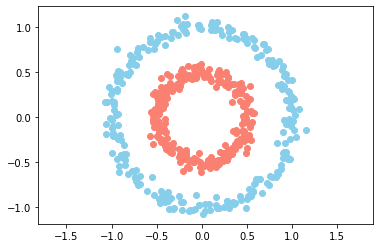

In [ ]:
#CREAR DATASET

n= 500  #numero de registros, filas
p = 2 #cuantas caracteristicas tienen los datos, columnas

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)  #facor, distincia entre puntos/// noise, es asemejarlo a la realidad al añadirle variabilidad
#print(Y)  #para ver si pertenece o no a un punto

Y = Y[:, np.newaxis]  # decimos que con todos los valores, le añaidmos una nueva dimension, una columna(newaxis) -> esto se hace por que nos declara Y como (500,) es decir no como una matriz con una columna, si no como un conjunto de valores
print(Y.shape)

#apoyandonos de la informacion anterior decimos que que muestre cuando el indice del vector es igual a 0 y cuando es igual  a 1
plt.scatter(X[Y[:, 0] == 0 ,0], X[Y[:, 0] == 0, 1], c="skyblue") #En el eje X que se visualice todos los puntos(:) y la cordinada numero 1(columna 1) y en el eje y todos los puntos(:) y la cordenada 2
plt.scatter(X[Y[:, 0] == 1 ,0], X[Y[:, 0] == 1, 1], c="salmon") #Nos referimos a la dimension de Y que añádimos con [:, 0]
plt.axis("equal")  #que nos visulice los ejes con la misma proporcion, iguales de tamaño

plt.show()
#Hay que lograr separar estos dos circulos con puntos, es decir, tener uno separado de otro

In [ ]:
#CLASE DE LA CAPA DE LA RED

#dentro de una capa realizamos las mismas operaciones para todas las neuronas, entonces tenemos capas como modulos, donde cada capa podra relizar una operacion para todas neuronas

class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):  #hay que ver cuantas conexions habra(n_nn) y cuantas neuronas tendra la capa y la funcion de activacion que esta ejecutando la capa
    self.act_f = act_f  #la funcion de activacion que usa sera la que le llega por el parametro(act_f)
    self.b = np.random.rand(1, n_neur)      * 2 - 1 #Iniclizamos los parametros de la capa, iniccializamos de forma aleatorio para bayes, con un vector columna y el numero de neuronas como filas
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1  #un matriz cuyos valores son el num de conx y y el num de neuronas


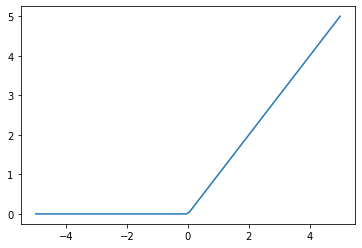

In [ ]:
#FUNCIONES DE ACTIVACION - > lo que nos permite hacer una suma ponderada y juntar muchas neuronas

#usaremos la sigmoide
sigm = (lambda x: 1/(1+ np.e ** (-x)),  #funcion anonima, hemos definido a la vez dos funciones
        lambda x: x * (1 - x))      #la primera es la funcion sigmoide  y la segunda es la derivada de esta que la usaremos para el algoritmo de backpropagation

#definimos la relu, aqui podemos ir definiendo todas las funciones de activacion que se quiera e ir poniendolas en el grafico
relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5 , 5, 100) #genera valores que van de -5 a 5 , 100 valores

plt.plot(_x, relu(_x))  #la representacion , en el eje x, y en el y el resultado de aplicar la funcion sigmoide


In [ ]:
#Ahora podemos diseñar nuestra red neuronal

#capa 0
l0 = neural_layer(p, 4, sigm) #(p)numero de conexiones de entrada, (4)numero de neuronas, funcion de activacion(sigm)
l1 = neural_layer(4, 8, sigm)
#.. y asi podriamos crear todas las capas

#creamos la funcion que creara estas capas
def create_nn(topology, act_f):  #definimos la funcion de activacion que tendran todas las capas(act_f)
  nn = [] #vector que contiene todas las capas de nuestra red neuronal, nuesra estructura de datos
  for l, layer in enumerate(topology[:-1]):  #Me da el indice(l) en el vector que recorro como el objeto(layer) ->(enumerate), recorrecomes topology hasta -1, sin llgar al ultimo valor
    
    nn.append(neural_layer(topology[l], topology[l+1], act_f))  #la primera capa tendra el numero de conexiones que tengo en [1] de topology, con el numero de neuronas de [l+1] de topology, con una funcion de activacion (act_f), eso contendra nuestra primera capaa oculta
  
  return nn

#probamos a crear nuestra red neuronal y tendra seis capas ocultas del vector toplogy

In [ ]:
#haremos un funcion para que cree la red neuronal
#topology = [p, 4, 8, 16, 8, 4, 1]   #la primera capa tendra el numero de atributos de entrada que tenga mi capa, luego definimos el num de nueronas que tendran las capas, 4, 8.. y la ultima pues sera 1 neuronal por que debe ser o 1 o 0 , es decir, pertenece a un color o a otro.
topology = [p, 4, 8, 1] #He tenido que usar esta pologia debido a que la anterior era demsiado compleja para la cantidad de datos que tengo(pocos)

#Ya tenemos la estructura de nuestra red neuronal!
neural_net = create_nn(topology, sigm)

#LA LOGICA DE NUESTRA RED NEURONAL, ES DECIR, EL ENTRENAMIENTO

#1. le muestro tipo de dato en entrada y un dato de salida(el que quiero obtener) y asi ira iterando hasta que el valor que me de sea igual al que le doy de salida
#2. cuando tenga el valor de salida lo comparo con el bueno(vector esperado), esta comparacion la hago con la funcion de coste que es la que me dice como se diferencian ambos resultados
#3. lo anterior me genera un error y este error lo usamos para hacer una propagacion hacia atras(backpropagation algorithm), para asi calcular las derivadas parciales que son las que nos dan otras derivadas que contienen informacion para usar el siguiente algoritmo
#4. el algortimo del descenso del gradiante, que es lo que me permite optimizar la funcion de coste y por lo tanto entrenar a la red neuronal

#creamos nuestra funcion de coste(en este caso, error cuadratico medio)
l2_cost= (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),   #vemos cuanto difiere un valor de otro, por eso usamos la media de este vector, porq ue habra muchos valores(np.mean)
          lambda Yp, Yr: (Yp - Yr))  #su derivada

#AQUI PASARA TODO Foward pass(1,2) , background pass(3) y el decenso del gradiente

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):  #pasamos la red neuronal, (X,Y)datos de entrada y salida, la funcion de coste, el ratio de aprendizaje(un factor que nos permite determinar en que grado estamos actulizando nuestros parametros en base a la info que nos da el descenso del grdiente) , train=True es para que la entrene, por que a lo mejor solo queremos obtener un resultado, es decir obtener una prediccion sin entrenar a la red

  #vector que guarda los pares de informacion de la suma ponderada y la activacion de la capa 0,1,2..
  out = [(None, X)]      #out = [(z0, a1, (z1, a1), ....] //Defimos el primer valor por que el bucle coge el primer valor en z , y no habra nada en suma ponderada(None) y el output de esa capa de entrada sera el vector X(el primero, los datos vamos)
  
  #FORWARD PASS -> hacemos que nuestro vector de entrada pase capa por capa ejecutando las operaciones que se hacen en cad auno de las neuronas(suma ponderada y luego pasar esa suma a una funcion de activacion)
  for l, layer in enumerate(neural_net): #recorre todas las capas de nuestra red neuronal(neural_net)
  
    #asi con el indice l recorremos todas las capas de nuestra red neuronal
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b #(z)suma ponderda -> (@)mulitplicamos matricialmente la matriz de entrada por lo que haya en la capa 1(su parametro de los pesos) y le sumamos el parametro b(el paramtro de bayas) de la primera capa // out[-1][1] cogemos el valor de la ultima suma ponderada y la activacion como valor de entrada, input
    a = neural_net[l].act_f[0](z)   #(a)activacion -> le pasamos la suma poderada a la capa 0 la funcion de activacion, que sera la salida de la capa 1  //act_f usamos la funcion de activacion que estaba en el indice 0

    out.append((z, a)) #Vamos guardando los valores de z y de a

  print(l2_cost[0](out[-1][1],Y)) #Nos imprime el error cuadratico, comparando el resultado de train y la Y(mi salida)

  #BACKWARDS PASS
  if train:  #si train es true pues entreno la red neuronal

    #inicia BACKWARD PASS -> algoritmo backpropagation, es implementar una serie de formulas que nos daran las derivadas parciales para luego usarlas en el algortimo del gradient descent, esas derivadas parciales seran las de W y b(bayes) con respecto al coste
    #debemos propagar el error de la red hacia atras, con la variable delta. ibamos calculando nuestras deltas conforme ibamos hacia atras por que teniamos dos formulas que nos permitian hacerlo (una delta para la ultima capa y otra para clacular la delta en funcion del error de la capa anterior, que es la vamos a usar para el resto de las capas)
    deltas = []  #almacenamos todas las deltas calculadas

    for l in reversed(range(0, len(neural_net))):   # ira de 0 hasta la lonigtud del numero de capas de nuestra red neuronal y lo haremos hacia atras con reverseed

      z = out[l+1][0]   #l se refiere al vector de capas de nuestra red neuronal(que no hemos puesto la primera capa) y resolvemos los indices con l+1
      a = out[l+1][1]
      
      print(a.shape)  #Son los tamanios que tendrian nuestras salidas por cada capa si fueramos hacia atras

      #Caso 2: el resto de capas -> calcular delta con respecto a capa previa
      #Caso 1: ultima capa -> calcular delta ultima capa
      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a) )  #insert pone el elemento al principio como estamos yendo hacia atras, mientras que append lo pone al final del array // la funcion de coste va para (a)salida de nuestra red neuronal y (Y) con los valores esperados reales * derivada de la funcion de activacion(act_f[1]: la derivada de la funcion de activacion, activamos en el punto a, equivalente a la activacion de la neurona) de la ultima capa(neural_net(l))
      else:
        #print(deltas[0].shape, _W.shape)
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a) )   #ahora usamos la detla anterior[0] y lo multiplicamos maltricionalmente por el vector de pesos W correpondiente a la capa sisguiente, debemos mirar las conexiones con la capa l+1, no olvidemos que estamos yendo reversed, es decir, hacia atras, cuando digo siguiente, voy para atras

      _W= neural_net[l].W #No puedes hacer backpropagation en funcion de unos valores que estaremos modificando en GRADIENTE DESCENT(optimizacion) , por que guardamos la varible temporalmente para usarla en las iteraciones

    #GRADIENT DESCENT -> pide que pasemos por cada una de las capas de nuestra red neuronal actulizando los valores, haremos mientras hacemos el pase a atras el actulizar nuestros parametros en funcion de los vectores gradiantes
      #print(neural_net[1].b.shape, deltas[0].shape)  Nos ayuda a ver si las dimensiones de las matrices tienen sentido
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr  #actualizmaos el parametro b, debemos restar el valor medio del ultimo valor que hemos insertado en deltas con el parametro b de la capa en la que nos encontramos, el resto de valores es para mantener la dimension(deltas, axis, keepdims) -> HEMOS optimizado el coste en funcion del parametro de bayes
      #print(out[l][1].T.shape, deltas[0].shape)
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr # ESTOS CALCULOS son formulas que poenmos sin mas, solo hay que verlos // cogemos las deltas y lo multiplicarlas por la activacion de la capa anterior, coegemos de nuestro vector de out, el elemento anterior, los indices de la capa anterior y eso lo multiplicamos matricialmente

  return out[-1][1] #Devolvemos de la ultima capa el valor en el indice 1

train(neural_net, X, Y, l2_cost, 0.5 )  #Ahora nos dara un resultado pero sin mucho sentido ya que solo tiene el Forward pass
print("") # para que no me imprima los vectores de antes

0.2808200554263933
(500, 1)
(500, 8)
(500, 4)



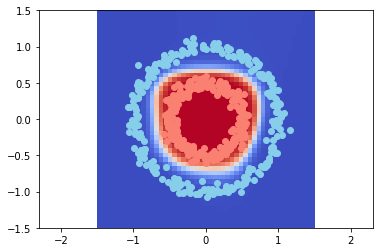

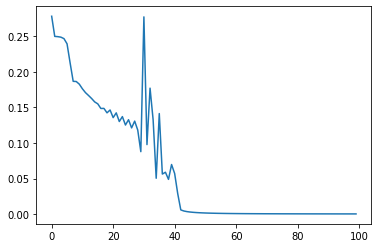

0.00025496645298565324
(500, 1)
(500, 8)
(500, 4)
0.0002548181595640921
(500, 1)
(500, 8)
(500, 4)
0.00025467006637601056
(500, 1)
(500, 8)
(500, 4)
0.00025452217298710833
(500, 1)
(500, 8)
(500, 4)
0.0002543744789643533
(500, 1)
(500, 8)
(500, 4)
0.0002542269838759864
(500, 1)
(500, 8)
(500, 4)
0.0002540796872915093
(500, 1)
(500, 8)
(500, 4)
0.00025393258878168623
(500, 1)
(500, 8)
(500, 4)
0.0002537856879185325
(500, 1)
(500, 8)
(500, 4)
0.00025363898427531814
(500, 1)
(500, 8)
(500, 4)
0.00025349247742655566
(500, 1)
(500, 8)
(500, 4)
0.00025334616694800045
(500, 1)
(500, 8)
(500, 4)
0.0002532000524166438
(500, 1)
(500, 8)
(500, 4)
0.0002530541334107095
(500, 1)
(500, 8)
(500, 4)
0.0002529084095096485
(500, 1)
(500, 8)
(500, 4)
0.0002527628802941355
(500, 1)
(500, 8)
(500, 4)
0.00025261754534606465
(500, 1)
(500, 8)
(500, 4)
0.0002524724042485431
(500, 1)
(500, 8)
(500, 4)
0.0002523274565858873
(500, 1)
(500, 8)
(500, 4)
0.00025218270194362155
(500, 1)
(500, 8)
(500, 4)
0.000252038

In [ ]:
#INTERFAZ PARA USAR LA RED NEURONAL -> iteramos un n numero de veces el algoritmo de la red neuronal para entrenarlo y obtener un resultado

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = [] #guardamos los costes, para poder graficarlo con respecto al tiempo

for i in range(2500): #iteramos 1000 mientras llamamos a la funcion train
  
  #Entrenemos a la red
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)

  if i % 25 == 0: #cada 25 iter

    loss.append(l2_cost[0](pY, Y))  #Calculamo el coste y lo añadimos a nuestro vector

    res = 50; #Es la resolucion, una malla de 50 x 50
  
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    #En cada punto de la malla hacemos una prediccion de nuestra red neuronal, por eso train=False, asi podemos visulizar en rojo y azul, todo el area que la red neuronal considera de una clase o de la otra 
    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([x0, x1]), Y, l2_cost, train=False)[0][0]

    #La visualizacion de lo anterior es esto , que borro y genera el contenido nuevamente para que se vea de forma animada
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c ="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c ="salmon")    

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)

    #HEMOS CONSEGUIDO CON UN lr=0.05 que nuestro dato se separen y consigan la forma deseada con este dataset
